# <font color ='blue'>Zillow Clustering Project
    
<img src="zillow_logo.png" alt="Zillow Logo" title="Zillow Logo" width="300" height="100" align="right"/>
    
    
# <p style="font-size:50px" align="center">Zestimate Error</p> <sub>By Kaniela Denis and Mason Sherbondy - 10 Jan 2022</sub>

In [1]:
# import pandas and numpy to start coding
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import acquire
import prepare
import clustering
import modeling
import viz

import warnings
warnings.filterwarnings("ignore")

## Project Goal
The goal of this project is to discovering drivers for Zillow Zestimate Error by using clustering. It is the hope of the project that clustering features will decrease the RMSE for regression modeling the logerror

## Project Description
By understanding the drivers for the Zestimate error, Zillow models can be adjusted to increase accuracy of house values. This project will explore clusters of data in order to determine features that drive Zestimate error in order to improved the accuracy of current regression models.

## Data Dictionary

In [2]:
# Read Data Dictionary from working directory
dd = pd.read_excel('zillow_data_dictionary.xlsx')
dd

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (i...
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, ..."
2,'basementsqft',Finished living area below or partially below...
3,'bathroomcnt',Number of bathrooms in home including fractio...
4,'bedroomcnt',Number of bedrooms in home
5,'buildingqualitytypeid',Overall assessment of condition of the buildi...
6,'buildingclasstypeid',"The building framing type (steel frame, wood f..."
7,'calculatedfinishedsquarefeet',Calculated total finished living area of the ...
8,'fips',Federal Information Processing Standard code ...
9,'fullbathcnt',"Number of full bathrooms (sink, shower + bath..."


<hr style="border:2px solid blue"> </hr>

# Wrangle

## Actions Taken:
1. Data aquired from MySQL database and included only 2017 single family home transactions
2. 52K records pulled, included 1.7M nulls
3. Removed rows that have no bedrooms or no bathroms or have too smal an area
4. Removed columns with more than 50% null values and rows with more than 30% null values
5. Dropped all left over nulls as amounts were relatively small
6. Removed outliers that were 1.5 times Interquartile Range above third quartile or below first quartile
7. Dropped columns that couldn't be used or were redundant
8. Renamed columsn for readability
9. Created new columns for dimension reduction
10. Split the data into train, test, validate using 56%, 24%, 20% ratio for each set
11. Created scaled columns for exploration, clustering, and modeling
12. After Wrangle: 31K records

In [3]:
df = acquire.get_zillow()

In [4]:
df, train, validate, test, train_scaled, validate_scaled, test_scaled = prepare.wrangle(df)

<hr style="border:2px solid blue"> </hr>

# Exploratory Data Analysis

## Context
- After Wrangle, 

## Initital Questions
- Which county has the most log error?
- Which tax rate has the most log error?
- What combinatin of bedroom and bathroom has the most log error?
- What tax value has the most log error?
- Is log error associated to house size?
- Is log error associated to lot size?

## Question 1: ???

## Statistical Testing

## Exploration Summary
### Take Away:
- ???

## Move Forward with Age, House Area, Dollar per Land Sqft, and Bed to Bath Ratio

<hr style="border:2px solid blue"> </hr>

# Clustering
- Move forward with age, house_area, land_dollar_sqf, and bed_bath_ratio

In [6]:
train, validate, test = clustering.cluster_combo_1(train, validate, test, train_scaled, validate_scaled, test_scaled)

In [7]:
# check mean of logerror for each cluster
train.groupby(by='cluster').logerror_abs.mean()

cluster
0    0.034820
1    0.028358
2    0.033275
3    0.034289
4    0.026652
5    0.040678
Name: logerror_abs, dtype: float64

In [8]:
train, validate, test = clustering.cluster_combo_2(train, validate, test, train_scaled, validate_scaled, test_scaled)

In [9]:
# check mean of logerror for each cluster
train.groupby(by='cluster').logerror_abs.mean()

cluster
0    0.031397
1    0.040463
2    0.035747
3    0.027624
4    0.026967
5    0.032690
Name: logerror_abs, dtype: float64

In [10]:
train, validate, test = clustering.cluster_combo_3(train, validate, test, train_scaled, validate_scaled, test_scaled)

In [11]:
# check mean of logerror for each cluster
train.groupby(by='cluster').logerror_abs.mean()

cluster
0    0.030731
1    0.027163
2    0.040674
3    0.035557
4    0.034350
5    0.034266
Name: logerror_abs, dtype: float64

<hr style="border:2px solid blue"> </hr>

# Modeling

## Modeling Prep:
- Create dummy columns for cluster 3
- Create X and y versions of train, validate, test
- Create scaled X and y versions for feature engineering and selection

In [12]:
train, validate, test, X_train, X_validate, X_test, y_train, y_validate, y_test, X_train_scaled, X_validate_scaled, X_test_scaled = modeling.model_prep(train, validate, test)

## Feature Engineering

In [13]:
f_feature = modeling.select_k_best(X_train_scaled, y_train)
f_feature

['age', 'cluster_1', 'cluster_2']

In [14]:
rfe_feature = modeling.rfe(X_train_scaled, y_train)
rfe_feature

['land_dollar_sqft', 'house_dollar_sqft', 'age']

## Baseline Model

In [15]:
y_train, y_validate, metric_df= modeling.model_baseline(y_train, y_validate)
metric_df

,model,RMSE_train,RMSE_validate,RMSE_test:,RMSE_diff:
0,mean_baseline,0.027634,0.027508,none,0.000126


In [16]:
y_train, y_validate, metric_df = modeling.model_ols_wo_cluster(train, validate, test, y_train, y_validate, metric_df)
metric_df

,model,RMSE_train,RMSE_validate,RMSE_test:,RMSE_diff:
0,mean_baseline,0.027634,0.027508,none,0.000126
1,ols_regressor_wo_cluster,0.027308,0.027182,none,0.000126


In [17]:
y_train, y_validate, metric_df = modeling.model_osl_w_cluster(train, validate, test, y_train, y_validate, metric_df)
metric_df

,model,RMSE_train,RMSE_validate,RMSE_test:,RMSE_diff:
0,mean_baseline,0.027634,0.027508,none,0.000126
1,ols_regressor_wo_cluster,0.027308,0.027182,none,0.000126
2,ols_regressor_w_cluster,0.027306,0.027179,none,0.000126


In [18]:
y_train, y_validate, metric_df = modeling.model_osl_w_cluster_more_features(train, validate, test, y_train, y_validate, metric_df)
metric_df

,model,RMSE_train,RMSE_validate,RMSE_test:,RMSE_diff:
0,mean_baseline,0.027634,0.027508,none,0.000126
1,ols_regressor_wo_cluster,0.027308,0.027182,none,0.000126
2,ols_regressor_w_cluster,0.027306,0.027179,none,0.000126
3,ols_regressor_w_cluster_and_features,0.027302,0.027179,none,0.000123


In [19]:
y_train, y_validate, X_test_degree2, ols2, rmse_train, metric_df = modeling.model_ployreg_w_cluster_more_features(train, validate, test, y_train, y_validate, X_train_scaled, X_validate_scaled, X_test_scaled, metric_df)

## Results:
- ???

# Visualize Predictions:

### Plot Actual vs. Predicted House Values

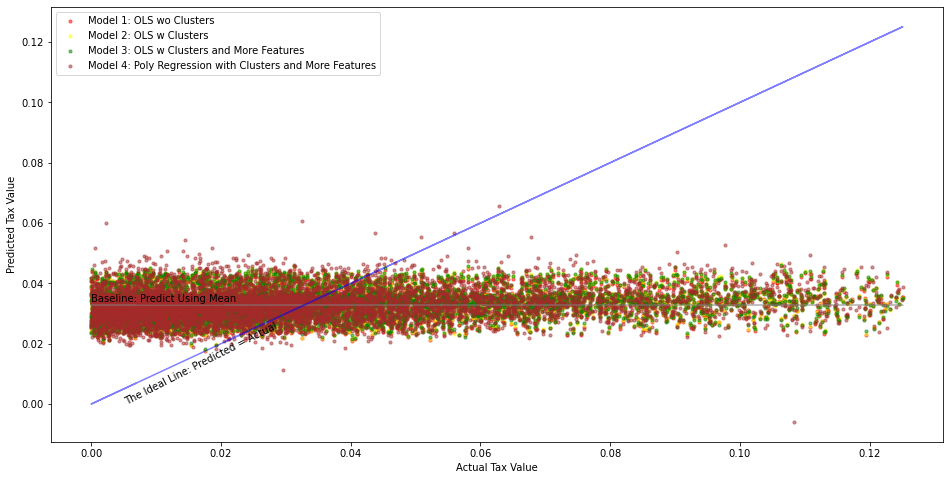

In [20]:
viz.plot_predictions(y_validate)

## Takeaways:
- ???

## Plot Distribution of Actual vs. Predicted House Values

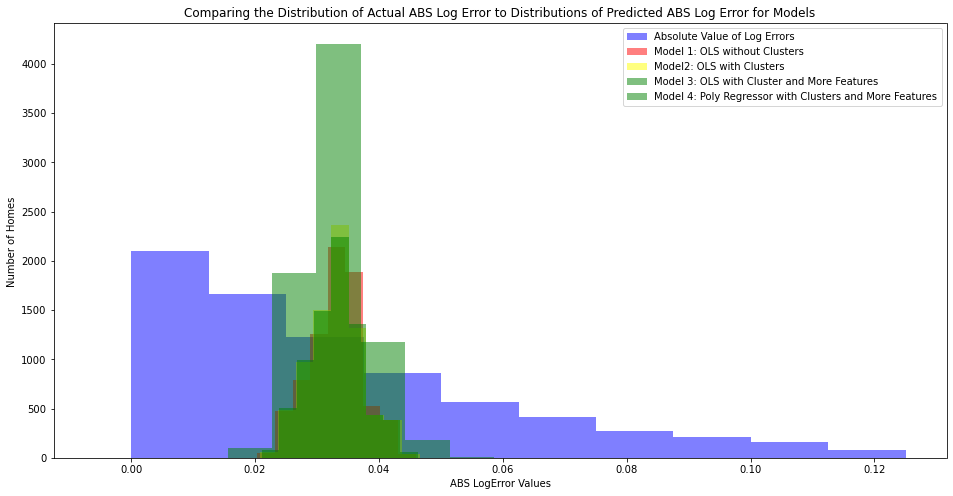

In [21]:
viz.plot_pred_actual_hist(y_validate)

## Takeaways: 
- Model Needs Improvement. Prediction Distribution Misses Actuals

## Plot Residuals of Predicted Log Error

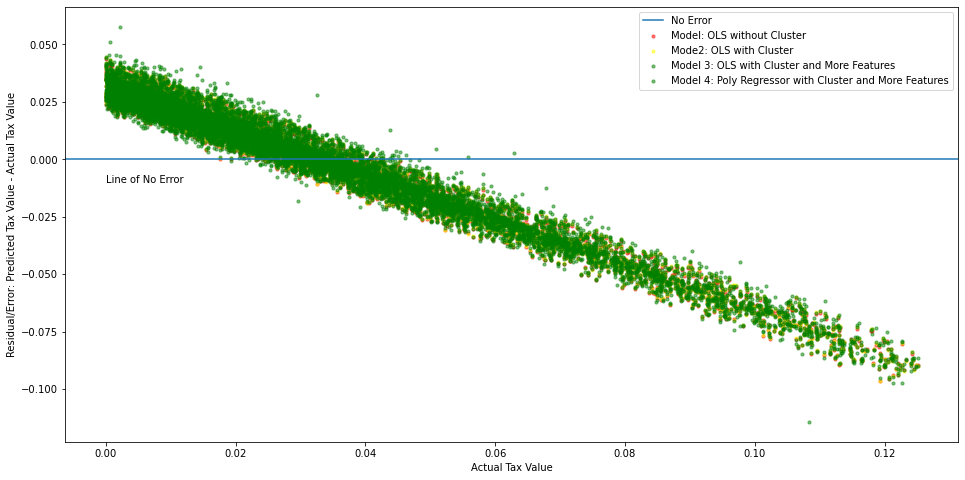

In [22]:
viz.plot_residuals(y_validate)

## Takeaways:
- Model Needs Improvement. Residuals Form a Trend

# Final Test Using Polynomial Model

In [23]:
y_test, metric_df = modeling.test_polyreg(X_test_degree2, y_test, ols2, rmse_train, metric_df)
metric_df

## Results:
- ???

# Conclusion

## Summary

### Project Goal
- Create a Model that predicts house tax assessment value
    - Sort of..
- Create new features to model.
    - Next Steps
- Find ways to make a better model for Zillow.
    - The Polynomial Model works but...

Take Aways:
- Los Angeles has significantly more houses than the other countied and on average they are valued less
    - Subgrouping by county will improve model results
- Highest valued houses are along the coast, some in Los Angeles County, some in Orange County
    - Subgrouping by coorindates will improve model results

## Recommendations
- Model Not Ready...More Time
- Need More Features
- Keep Features: House Size, Location, County

## Next Steps
- With more time, I would add more features, feature engineering, and subgroup by county or coordinates
- There's hope!!!

### Thank You!!!